In [27]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [40]:
df_US_DE = df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='United States')].copy()
df_US_DE['job_posted_month'] = df_US_DE['job_posted_date'].dt.month
df_US_DE_exp = df_US_DE.explode('job_skills')

In [41]:
df_US_DE_pivot = df_US_DE_exp.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_US_DE_pivot.loc['Total'] = df_US_DE_pivot.sum()
df_US_DE_pivot = df_US_DE_pivot[df_US_DE_pivot.loc['Total'].sort_values(ascending=False).index]
df_US_DE_pivot = df_US_DE_pivot.drop('Total')
df_US_DE_pivot

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,kali,powerbi,mlpack,qt,fastify,workfront,wrike,xamarin,sqlserver,svelte
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,1826,1745,1119,841,916,695,592,515,547,517,...,0,0,0,0,0,0,0,0,0,0
2,2109,2043,1415,965,1063,829,763,645,647,597,...,0,0,0,0,0,0,0,0,0,0
3,2204,2126,1472,1023,1038,791,704,640,605,587,...,0,0,0,0,0,0,0,0,0,0
4,1914,1868,1222,937,878,682,676,498,514,534,...,0,0,0,0,0,0,0,0,0,0
5,2077,2023,1252,990,952,730,681,529,491,509,...,0,0,0,0,0,0,0,1,0,0
6,2048,1882,1260,947,955,686,668,516,495,459,...,2,0,0,0,0,0,0,0,0,0
7,1789,1689,1166,794,821,615,624,483,448,461,...,0,0,0,1,0,1,0,0,0,0
8,2246,2155,1388,1003,1006,754,749,594,565,557,...,0,0,0,0,0,0,0,0,1,1
9,2090,1934,1267,960,941,671,700,479,500,483,...,0,1,0,0,0,0,0,0,0,0


In [42]:
DE_totals = df_US_DE.groupby('job_posted_month').size()

In [43]:
df_US_DE_perc = df_US_DE_pivot.div(DE_totals/100, axis=0)  #Con esta funcion buscamos el porcentaje para todos los meses
df_US_DE_perc

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,kali,powerbi,mlpack,qt,fastify,workfront,wrike,xamarin,sqlserver,svelte
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,68.775895,65.725047,42.146893,31.676083,34.500942,26.177024,22.297552,19.397363,20.602637,19.472693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
2,68.921569,66.764706,46.241830,31.535948,34.738562,27.091503,24.934641,21.078431,21.143791,19.509804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
3,69.242853,66.792334,46.245680,32.139491,32.610745,24.850770,22.117499,20.106817,19.007226,18.441722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
4,68.332738,66.690468,43.627276,33.452338,31.345948,24.348447,24.134238,17.779365,18.350589,19.064620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
5,69.791667,67.977151,42.069892,33.266129,31.989247,24.529570,22.883065,17.775538,16.498656,17.103495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033602,0.00000,0.00000
6,70.791566,65.053578,43.553405,32.734186,33.010716,23.712409,23.090218,17.836156,17.110266,15.865883,...,0.069132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
7,69.610895,65.719844,45.369650,30.894942,31.945525,23.929961,24.280156,18.793774,17.431907,17.937743,...,0.000000,0.000000,0.000000,0.038911,0.000000,0.038911,0.000000,0.000000,0.00000,0.00000
8,68.706026,65.922300,42.459468,30.682166,30.773937,23.065158,22.912206,18.170694,17.283573,17.038850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03059,0.03059
9,64.826303,59.987593,39.299007,29.776675,29.187345,20.812655,21.712159,14.857320,15.508685,14.981390,...,0.000000,0.031017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


In [ ]:
# Cambiar los indices de meses en numero a meses con nnombre
df_US_DE_perc = df_US_DE_perc.reset_index()
df_US_DE_perc['job_posted_month_l'] = df_US_DE_perc['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_US_DE_perc = df_US_DE_perc.set_index('job_posted_month_l')
df_US_DE_perc = df_US_DE_perc.drop(columns='job_posted_month')
df_US_DE_perc

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,kali,powerbi,mlpack,qt,fastify,workfront,wrike,xamarin,sqlserver,svelte
job_posted_month_l,,,,,,,,,,,,,,,,,,,,,
Jan,68.775895,65.725047,42.146893,31.676083,34.500942,26.177024,22.297552,19.397363,20.602637,19.472693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Feb,68.921569,66.764706,46.241830,31.535948,34.738562,27.091503,24.934641,21.078431,21.143791,19.509804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Mar,69.242853,66.792334,46.245680,32.139491,32.610745,24.850770,22.117499,20.106817,19.007226,18.441722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Apr,68.332738,66.690468,43.627276,33.452338,31.345948,24.348447,24.134238,17.779365,18.350589,19.064620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
May,69.791667,67.977151,42.069892,33.266129,31.989247,24.529570,22.883065,17.775538,16.498656,17.103495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033602,0.00000,0.00000
Jun,70.791566,65.053578,43.553405,32.734186,33.010716,23.712409,23.090218,17.836156,17.110266,15.865883,...,0.069132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Jul,69.610895,65.719844,45.369650,30.894942,31.945525,23.929961,24.280156,18.793774,17.431907,17.937743,...,0.000000,0.000000,0.000000,0.038911,0.000000,0.038911,0.000000,0.000000,0.00000,0.00000
Aug,68.706026,65.922300,42.459468,30.682166,30.773937,23.065158,22.912206,18.170694,17.283573,17.038850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03059,0.03059
Sep,64.826303,59.987593,39.299007,29.776675,29.187345,20.812655,21.712159,14.857320,15.508685,14.981390,...,0.000000,0.031017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


In [48]:
df_plot = df_US_DE_perc.iloc[:, :5]   #Seleccionar 5 columnas con todas las filas
df_plot

job_skills,sql,python,aws,azure,spark
job_posted_month_l,,,,,
Jan,68.775895,65.725047,42.146893,31.676083,34.500942
Feb,68.921569,66.764706,46.241830,31.535948,34.738562
Mar,69.242853,66.792334,46.245680,32.139491,32.610745
Apr,68.332738,66.690468,43.627276,33.452338,31.345948
May,69.791667,67.977151,42.069892,33.266129,31.989247
Jun,70.791566,65.053578,43.553405,32.734186,33.010716
Jul,69.610895,65.719844,45.369650,30.894942,31.945525
Aug,68.706026,65.922300,42.459468,30.682166,30.773937
Sep,64.826303,59.987593,39.299007,29.776675,29.187345


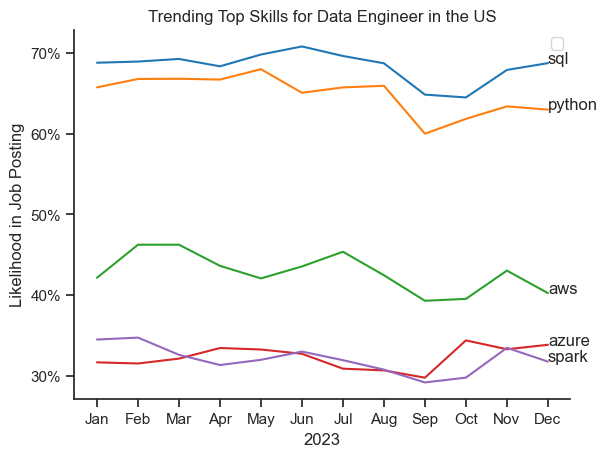

In [ ]:
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Engineer in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2025')
plt.legend('')
sns.despine()

# Formato para establecer porcentaje a los ejes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Colocar el titulo al final de cada linea
for i in range(5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()